<a href="https://colab.research.google.com/github/youneseltrach/ML_algo/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import numpy as np
import matplotlib.pyplot as plt

## sigmoid function
> $$g(z) = \frac{1}{1+e^{-z}}$$

In [130]:
#sigmoid function
def sigmoid(z):
  return 1/(1 + np.exp(-z))

In [133]:
# verify our sigmoid function
sigmoid(0)

0.5

## Implementation of cost function
> This is the cost function:

$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \right] $$

In [125]:
# cost function
def cost_function (x,y,w,b):
  m = x.shape[0]
  cost = 0.0

  for i in range (m):
    fun = sigmoid (np.dot(x[i],w) + b)
    cost = cost - y[i]*np.log(fun) - (1-y[i])*np.log(1-fun)
  cost = cost / m
  return cost

## Gradient descent
> Gradient descent of logistic regression is the some as the linear regression, the only thing that is added is the sigmoid function.
> The Gradient descent is: \
\
$$\begin{align*}& \text{repeat:} \; \lbrace \newline \; & b := b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \newline       \; & w_j := w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j}   \; & \text{for j := 0..n-1}\newline & \rbrace\end{align*}$$\
> Where the gradient is:
$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})
$$
$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)}
$$
> Now, for implement the gradient descent, we have first of all to develope de function for calculate the gradient `calculate_gradient`, than we use it in `gradient_descent`

In [127]:
# calculate gradient
def calculate_gradient (x,y,w,b):
  m,n = x.shape

  w_i = np.zeros((n,))
  b_i = 0

  for i in range (m):
    fun = sigmoid ( np.dot( x[i], w ) + b )
    err = fun - y[i]
    for j in range (n):
      w_i[j] = w_i[j] + err*x[i,j]
    b_i = b_i + err
  w_i = w_i/m
  b_i = b_i/m
  return w_i, b_i

> Gradient descent

In [47]:
# gradient descent
def gradient_descent (x,y,w,b,itr, alpha, cost_function, calculate_gradient):

  all_cost = []
  w_i = w
  b_i = b

  for i in range (itr):
    w_g, b_g = calculate_gradient(x,y,w_i,b_i)
    w_i = w_i - alpha * w_g
    b_i = b_i - alpha * b_g

    all_cost.append(cost_function(x,y,w_i,b_i))

    if i%1000 == 0:
      print (f"i = {i} ; cost = {all_cost[-1]}")
    
  return w_i, b_i, all_cost

## Test our algorithm

In [128]:
# generate data with 2 labels (0,1) 
x_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

In [126]:
# verify the dimention of our data
print (f"x_train :{x_train.shape}")
print (f"y_train :{y_train.shape}")

x_train :(6, 2)
y_train :(6,)


> Now, lets call (train or fit) our function `gradient_descent` for minimazing the cost function and obtain the best values  for ($w_i,b$)

In [135]:
w  = np.zeros_like(x_train[0])
b  = 0.
alpha = 0.1
itr = 10000
w_final, b_final, all_cost = gradient_descent (x_train, y_train,w,b, itr, alpha, cost_function, calculate_gradient)
print( f"Paramater final (w,b) = ({w_final},{b_final})")

i = 0 ; cost = 0.684610468560574
i = 1000 ; cost = 0.1590977666870457
i = 2000 ; cost = 0.08460064176930078
i = 3000 ; cost = 0.05705327279402531
i = 4000 ; cost = 0.04290759421682
i = 5000 ; cost = 0.03433847729884557
i = 6000 ; cost = 0.02860379802212006
i = 7000 ; cost = 0.02450156960879306
i = 8000 ; cost = 0.02142370332569295
i = 9000 ; cost = 0.019030137124109114
Paramater final (w,b) = ([5.28123029 5.07815608],-14.222409982019837)


> Plot the cost function with iterations

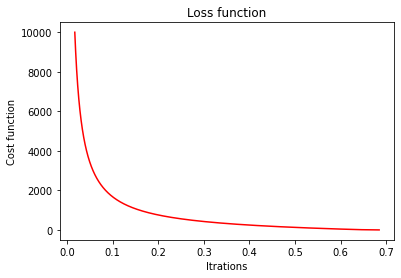

In [137]:
plt.plot(all_cost, np.arange(itr),c='red')
plt.xlabel('Itrations')
plt.ylabel('Cost function')
plt.title('Loss function')
plt.show()

> lets develope the funtion for predictions

In [119]:
#
def predict (x,w,b):
  m = x.shape[0]
  p = np.zeros (m)

  for i in range (m):
    fun = sigmoid (np.dot(x[i],w)+b)
    p[i] = 1 if fun > 0.5 else 0
  
  return p

> We give it the same x_train, and the paramerter final ($w\_final, b\_final$) and predict the result. We get the same values as in y_train.

In [138]:
predict(x_train,w_final, b_final)

array([0., 0., 0., 1., 1., 1.])

## Plot the decision boundary

In [122]:
# get the parameter for linear function
c = -b_final/w_final[1]    # the intercept
m = -w_final[0]/w_final[1] # slop

In [139]:
xmin, xmax = 0.5, 2.5 
ymin, ymax = 0.5, 3
x = np.array([xmin, xmax])
# function final
fun_linear = m*x + c 

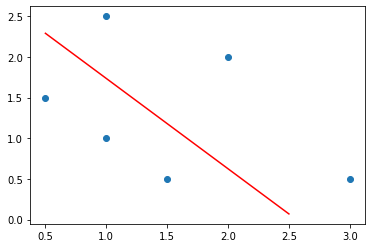

In [140]:
plt.scatter (x_train[:,0],x_train[:,1])
plt.plot(x, fun_linear, c = 'red', )